# Examen Data Scientist - Data analyseren in Python
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from datetime import datetime

sns.set_theme(style="whitegrid")

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [2]:
import pandas as pd
import os
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data', 'geboortes')
# Load data from the directory with multiple csv files
datas = os.listdir(data_dir)

# Create a list of dataframes
dfs = []
for file in datas:
    if file.endswith('.csv'):
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path)
        # Extract the file name without extension
        file_name = os.path.splitext(file)[0]
        # Add the file name as a column named 'werkelijke datum'
        df['werkelijke datum'] = file_name
        dfs.append(df)

dfs = pd.concat(dfs, ignore_index=True)
# Convert the 'verwachte datum' to datetime object
dfs['verwachte datum'] = (dfs['verwachte datum'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y')))

# Convert 'werkelijke datum' to datetime format, handling invalid dates
dfs['werkelijke datum'] = pd.to_datetime(dfs['werkelijke datum'], errors='coerce')
dfs.head(200)


,gemeente,naam,geslacht,verwachte datum,werkelijke datum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-08-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-08-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-08-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-08-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-08-30
...,...,...,...,...,...
195,Bilzen,Rita,Vrouwelijk,2019-09-06,2019-08-30
196,Luik,Sandra,Vrouwelijk,2019-09-04,2019-08-30
197,Yvoir,Julien,Mannelijk,2019-09-02,2019-08-30
198,Pelt,Laurens,Mannelijk,2019-08-28,2019-08-30


### Get to know our data 


In [3]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116923 entries, 0 to 116922
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gemeente          116923 non-null  object        
 1   naam              116923 non-null  object        
 2   geslacht          116923 non-null  object        
 3   verwachte datum   116923 non-null  datetime64[ns]
 4   werkelijke datum  116850 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 4.5+ MB


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

<class 'pandas.core.series.Series'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Series name: None
Non-Null Count  Dtype
--------------  -----
365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


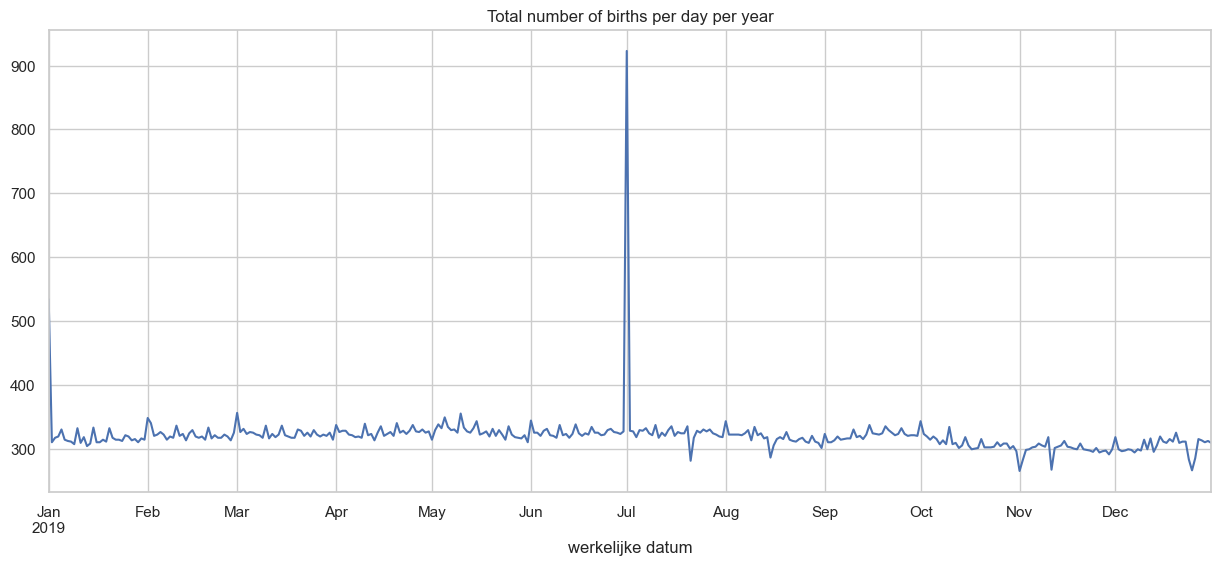

In [4]:
# Plot the total numbers of births per day per year using resampling
geboortes_per_dag = dfs.resample('D', on='werkelijke datum').size()
geboortes_per_dag.plot(title='Total number of births per day per year', figsize=(15, 6))
geboortes_per_dag.info()


##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [5]:
# Define the indexes where the number of births is greater than 50% than the mean of all values
mean = geboortes_per_dag.mean()
idxs_outliers = geboortes_per_dag > mean * 1.5

geboortes_per_dag = geboortes_per_dag[~(idxs_outliers)]

geboortes_per_dag


werkelijke datum
2019-01-02    310
2019-01-03    317
2019-01-04    319
2019-01-05    330
2019-01-06    314
             ... 
2019-12-27    315
2019-12-28    313
2019-12-29    310
2019-12-30    312
2019-12-31    309
Length: 363, dtype: int64

Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [6]:
# Drop all rows where 'werkelijke datum' is 2019-01-01 and 2019-07-01
dfs_right = (dfs[~(dfs['werkelijke datum'].isin(['2019-01-01', '2019-07-01']))]
                                            .copy())
dfs_wrong = (dfs[(dfs['werkelijke datum'].isin(['2019-01-01', '2019-07-01']))]
                                            .copy())

display(dfs_right)
display(dfs_wrong)

/var/folders/nk/nycb4f5s3tl6ks5bk08nwc0c0000gn/T/ipykernel_91066/3315021587.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dfs_right = (dfs[~(dfs['werkelijke datum'].isin(['2019-01-01', '2019-07-01']))]
/var/folders/nk/nycb4f5s3tl6ks5bk08nwc0c0000gn/T/ipykernel_91066/3315021587.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dfs_wrong = (dfs[(dfs['werkelijke datum'].isin(['2019-01-01', '2019-07-01']))]


,gemeente,naam,geslacht,verwachte datum,werkelijke datum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-08-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-08-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-08-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-08-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-08-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,2019-09-12,2019-08-29
116919,Torhout,Tom,Mannelijk,2019-09-12,2019-08-29
116920,Lochristi,Werner,Mannelijk,2019-08-31,2019-08-29
116921,La Louvière,Cédric,Mannelijk,2019-09-05,2019-08-29


,gemeente,naam,geslacht,verwachte datum,werkelijke datum
67043,Hooglede,Elias,Mannelijk,2019-01-14,2019-01-01
67044,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,2019-01-05,2019-01-01
67045,Wijnegem,Anita,Vrouwelijk,2019-01-05,2019-01-01
67046,Grâce-Hollogne,Jean-Paul,Mannelijk,2019-01-13,2019-01-01
67047,Boussu,François,Mannelijk,2019-01-26,2019-01-01
...,...,...,...,...,...
84843,Oostende,Magali,Vrouwelijk,2019-07-15,2019-07-01
84844,Rotselaar,Jean,Mannelijk,2019-06-30,2019-07-01
84845,Brussel,Lina,Vrouwelijk,2019-07-11,2019-07-01
84846,Hamont-Achel,Brenda,Vrouwelijk,2019-06-25,2019-07-01


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

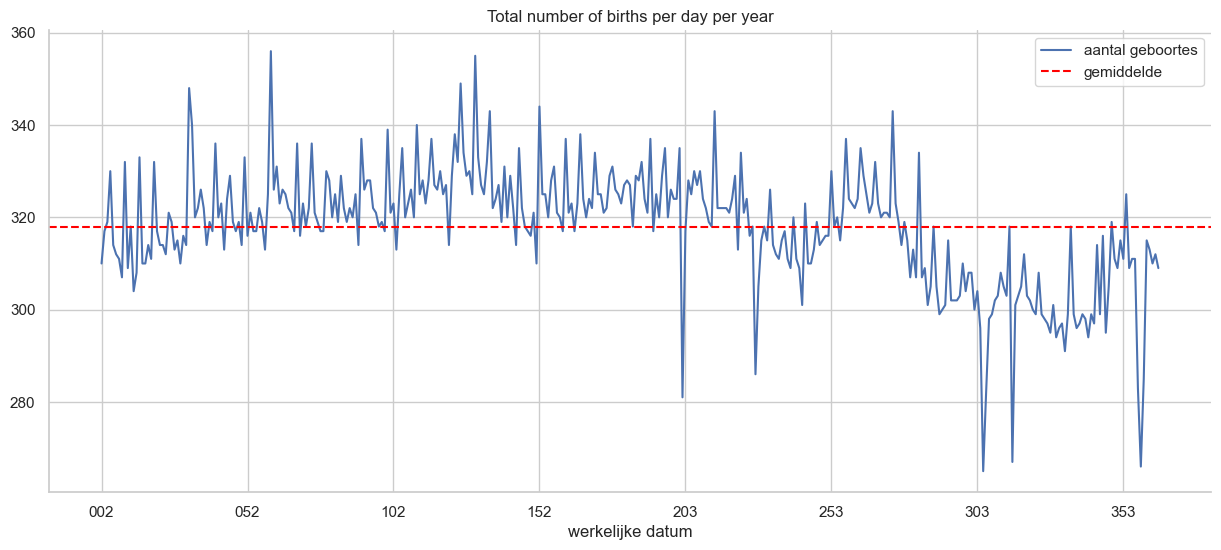

In [7]:
# Plot the total numbers of births per day per year using resampling
geboortes_per_dag = (dfs_right.groupby('werkelijke datum')
                                .size()
                                .rename('aantal geboortes'))
# Change the format of 'werkelijke datum' to number of the year 
geboortes_per_dag.index = geboortes_per_dag.index.strftime('%j')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
geboortes_per_dag.plot(title='Total number of births per day per year', ax=ax)

# Plot the mean as a horizontal line
mean = geboortes_per_dag.mean()
ax.axhline(mean, color='red', linestyle='--', label='gemiddelde')

# Add legend
ax.legend()
sns.despine()

# Show the plot
plt.show()



 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [10]:
resampled_data = dfs_right.groupby('werkelijke datum').size()

resampled_data = (resampled_data.resample('8D')
                                .agg(['mean', 'max', 'min']))
resampled_data.index = resampled_data.index.strftime('%j')

# write lambda function that will check the absolute difference between the mean and the max and min 
# values and create a new column with the result
resampled_data['diff'] = (resampled_data.apply(lambda x: max(abs(x['mean'] - x['max'])
                                                        , abs(x['mean'] - x['min']))
                                                        , axis=1))
resampled_data = resampled_data.sort_values(by='diff', ascending=False)


resampled_data


,mean,max,min,diff
werkelijke datum,,,,
202,320.250000,330,281,39.250000
354,300.625000,325,266,34.625000
314,301.375000,318,267,34.375000
298,299.375000,310,265,34.375000
058,328.125000,356,313,27.875000
226,312.125000,326,286,26.125000
026,321.875000,348,310,26.125000
274,319.125000,343,307,23.875000
282,310.750000,334,301,23.250000


## Stap 3: Onderzoeksvragen
### Onderzoek 1: Unisex namen
#### Een aantal statistieken
Sommige namen zijn unisex, dat wil zeggen dat zij hetzelfde zijn voor mannen en vrouwen. Beantwoord volgende 3 vragen over unisex namen in onze dataset:
 - Hoeveel unisex namen zijn er?
 - Wat is de meest voorkomende unisex naam; hiervoor zoek ik 3 namen (en getallen):
    - De meest populaire unisex naam bij mannen.
    - De meest populaire unisex naam bij vrouwen.
    - De meest popuaire unisex naam.

**Tip:** Neem hiervoor terug de volledige dataset in acht (dus met de foutief geklasseerde namen).

In [16]:
# Find all values 'naam' that are the same regardless value of 'geslacht'
unique_names_girls = dfs[dfs['geslacht'] == 'Vrouwelijk']['naam'].unique()
unique_names_men = dfs[dfs['geslacht'] == 'Mannelijk']['naam'].unique()

unisex = list(set(unique_names_men).intersection(set(unique_names_girls)))

grouped_names = (dfs.groupby(['naam', 'geslacht'])
                        .size()
                        .sort_values(ascending=False)
                        .reset_index(name='aantal geboortes'))

pivot_unisex = (grouped_names[grouped_names['naam'].isin(unisex)].pivot_table(index='naam'
                                                                , columns='geslacht'
                                                                , values='aantal geboortes'))
# Add a new column for the total births per name (summing across genders)
pivot_unisex['Totaal'] = pivot_unisex.sum(axis=1)

# Sort the pivot table by the total births in descending order
pivot_unisex_sorted = pivot_unisex.sort_values(by='Totaal', ascending=False)

# Optionally, if you want to drop the 'Totaal' column after sorting, you can do so
pivot_unisex_sorted = pivot_unisex_sorted.drop(columns=['Totaal'])

# Display the sorted pivot table
print(pivot_unisex_sorted)


geslacht   Mannelijk  Vrouwelijk
naam                            
Dominique      161.0       233.0
Maxime         203.0         7.0
Robin          185.0         8.0
Claude         167.0         7.0
José           142.0        29.0
...              ...         ...
Vivian           1.0         1.0
Yan              1.0         1.0
Dursun           1.0         1.0
Beau             1.0         1.0
Yi               1.0         1.0

[75 rows x 2 columns]


### Aanmaken van een Ratio-kolom om zodoende de outliers uit te filteren

In [ ]:
# Calculate the ratio of 'Mannelijk' to 'Vrouwelijk' births
# Use np.where to avoid division by zero; set the ratio as NaN where 'Vrouwelijk' births are 0
pivot_unisex_sorted['Ratio M/V'] = np.where(pivot_unisex_sorted['Vrouwelijk'] > 0, 
                                            pivot_unisex_sorted['Mannelijk'] / pivot_unisex_sorted['Vrouwelijk'], 
                                            np.nan)

# Display the updated pivot table
print(pivot_unisex_sorted)

geslacht   Mannelijk  Vrouwelijk  Ratio M/V
naam                                       
Dominique      161.0       233.0   0.690987
Maxime         203.0         7.0  29.000000
Robin          185.0         8.0  23.125000
Claude         167.0         7.0  23.857143
José           142.0        29.0   4.896552
...              ...         ...        ...
Vivian           1.0         1.0   1.000000
Yan              1.0         1.0   1.000000
Dursun           1.0         1.0   1.000000
Beau             1.0         1.0   1.000000
Yi               1.0         1.0   1.000000

[75 rows x 3 columns]


### Berekening 'valse unisex' namen zonder verhouding uitsluitsel

In [19]:
meest_gekozen_unisex = pivot_unisex.sort_values(by='Totaal', ascending=False).head(1).index[0]

meest_gekozen_man = pivot_unisex.sort_values(by='Mannelijk', ascending=False).head(1).index[0]

meest_gekozen_vrouw = pivot_unisex.sort_values(by='Vrouwelijk', ascending=False).head(1).index[0]

print(f"De meest gekozen (valse) unisex naam is: {meest_gekozen_unisex}")
print(f"De meest gekozen (valse) unisex bij mannen is: {meest_gekozen_man}")
print(f"De meest gekozen (valse) unisex bij vrouwen is: {meest_gekozen_vrouw}")


De meest gekozen (valse) unisex naam is: Dominique
De meest gekozen (valse) unisex bij mannen is: Maxime
De meest gekozen (valse) unisex bij vrouwen is: Dominique


We zien dat er een vrij groot aantal namen veel meer voorkomen bij mannen dan vrouwen (en omgekeerd). Dit vinden we eigenlijk geen "echte" unisex namen. We noemen een naam "echt unisex" als de naam niet meer dan 50% meer voorkomt bij 1 van de 2 geslachten. Dus als er `x` mannen en `y` vrouwen zijn genaamd Chris, dan noemen we Chris "echt unisex" als `x <= 1.5 * y` en `y <= x * 1.5`. Filter je unisex dataframe tot een `df_real_unisex` waarbij je enkel de "echte" unisex namen weerhoudt. 
- Beantwoord nu bovenstaande 3 vragen opnieuw voor deze dataset. Hierbij werk je best met een functie zodat je geen code moet herhalen!
- Zijn de echte unisex namen populairder bij mannen of vrouwen, of is de populariteit hetzelfde? Deze vraag kan je beantwoorden door te kijken naar het percentage mannen/vrouwen met een echte unisex naam.

In [ ]:
# Filter the pivot_unisex_sorted DataFrame for rows where the ratio is between (1/1.5) and 1.5
df_real_unisex = (pivot_unisex_sorted[(pivot_unisex_sorted['Ratio M/V'] <= 1.5) 
                                      & (pivot_unisex_sorted['Ratio M/V'] >= (1/1.5))])

# Sort by 'Mannelijk' and 'Vrouwelijk', and get the name of the top row
top_name_by_both = (df_real_unisex.sort_values(by=['Mannelijk', 'Vrouwelijk'], ascending=False)
                                    .index[0])
print(f"De algemeen meest gekozen unisex naam: {top_name_by_both}")
print("\n")

# Sort by 'Mannelijk' only, and get the name of the top row
top_name_by_mannelijk = (df_real_unisex.sort_values(by='Mannelijk', ascending=False)
                                        .index[0])
print(f"De meest gekozen unisex naam onder mannen: {top_name_by_mannelijk}")
print("\n")

# Sort by 'Vrouwelijk' only, and get the name of the top row
top_name_by_vrouwelijk = (df_real_unisex.sort_values(by='Vrouwelijk', ascending=False)
                                        .index[0])
print(f"De meest gekozen unisex naam onder vrouwen: {top_name_by_vrouwelijk}")

De algemeen meest gekozen unisex naam: Dominique


De meest gekozen unisex naam onder mannen: Dominique


De meest gekozen unisex naam onder vrouwen: Dominique


#### Visualizatie

Maak een visualizatie die alle echte unisex namen toont en de relatieve voorkomens bij mannen en vrouwen.

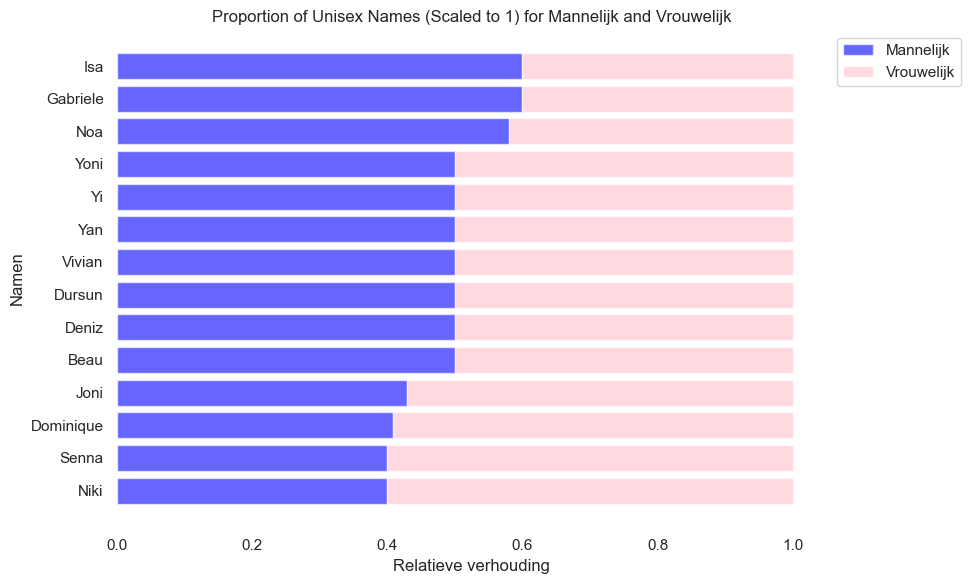

In [ ]:
# Create a deep copy
df_real_unisex = df_real_unisex.copy()

# Calculate total births
df_real_unisex['Total'] = (
    df_real_unisex['Mannelijk'] + df_real_unisex['Vrouwelijk']
)

# Calculate proportions
df_real_unisex['Proportion Mannelijk'] = (
    df_real_unisex['Mannelijk'] / df_real_unisex['Total']
)
df_real_unisex['Proportion Vrouwelijk'] = (
    df_real_unisex['Vrouwelijk'] / df_real_unisex['Total']
)

# Sort for visualization
df_real_unisex_sorted = df_real_unisex.sort_values(
    by='Proportion Mannelijk'
)

# Setup for horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot 'Mannelijk' proportions
ax.barh(
    df_real_unisex_sorted.index,
    df_real_unisex_sorted['Proportion Mannelijk'],
    label='Mannelijk', color='blue', alpha=0.6
)

# Plot 'Vrouwelijk' on top of 'Mannelijk'
ax.barh(
    df_real_unisex_sorted.index,
    df_real_unisex_sorted['Proportion Vrouwelijk'],
    left=df_real_unisex_sorted['Proportion Mannelijk'],
    label='Vrouwelijk', color='pink', alpha=0.6
)

# Add labels and title
ax.set_xlabel('Relatieve verhouding')
ax.set_ylabel('Namen')
ax.set_title(
    'Proportion of Unisex Names (Scaled to 1) '
    'for Mannelijk and Vrouwelijk'
)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()


### Onderzoek 2: de accuraatheid van de geschatte bevallingsdatum
#### Evolutie vergelijken

Maak een afbeelding van het totaal aantal geboortes per dag en het totaal aantal verwachte geboortes.

**Bonusvraag**: Gewoon om over na te denken: waarom zien de uiteindes van je plot er wat gek uit? Schrijf het antwoord neer in een strategisch geplaatste markdown cel.

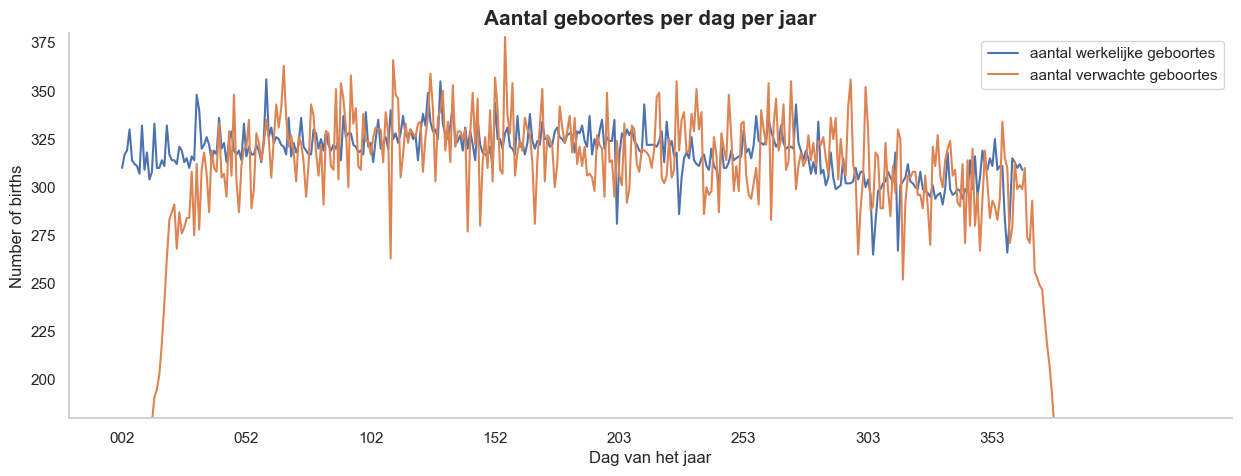

In [ ]:
# Plot the total numbers of births per day per year using resampling
werkelijke_geboortes = (dfs_right.groupby('werkelijke datum')
                                    .size()
                                    .rename('aantal werkelijke geboortes'))
verwachte_geboortes = (dfs_right.groupby('verwachte datum')
                                .size()
                                .rename('aantal verwachte geboortes'))
# Change the format of 'werkelijke datum' to number of the year 
werkelijke_geboortes.index = werkelijke_geboortes.index.strftime('%j')
verwachte_geboortes.index = verwachte_geboortes.index.strftime('%j')

# Now that datetime-related manipulations are done, reset the index of verwachte_geboortes
verwachte_geboortes = verwachte_geboortes.reset_index(drop=True)
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data
werkelijke_geboortes.plot(title='Total number of births per day per year', ax=ax)
verwachte_geboortes.plot(title='Total number of births per day per year', ax=ax)
ax.set_xlabel('Dag van het jaar')
ax.set_ylabel('Number of births')
ax.set_ylim(180, 380)
ax.grid(False)
ax.set_title('Aantal geboortes per dag per jaar', fontdict={'fontsize': 15, 'fontweight': 'bold'})
# Add legend
ax.legend()

sns.despine()

# Show the plot
plt.show()

#### Verbanden bekijken
Maak een histogram van het aantal dagen dat babies te vroeg geboren werden in 2019 en een scatterplot die het verband toont tussen de verwachte en effectieve geboortedatum.

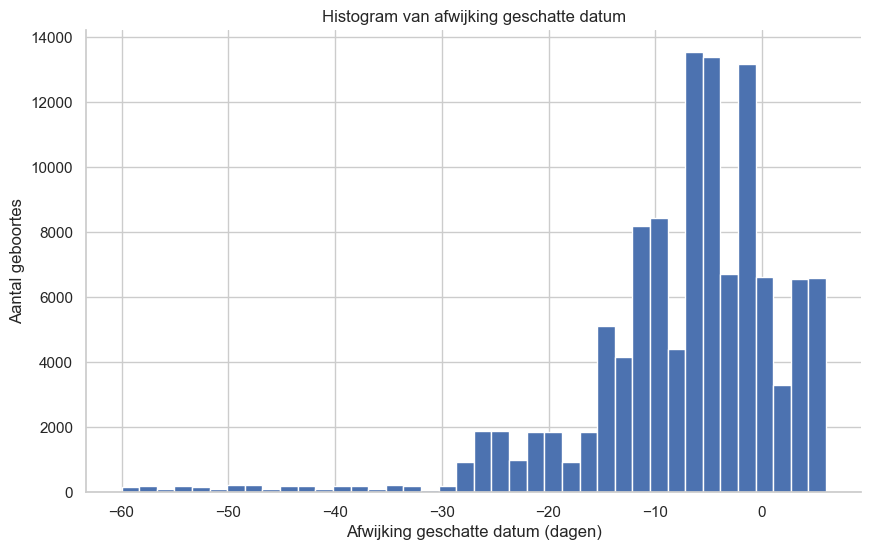

In [14]:
dfs_geboren = dfs_right.copy()

dfs_geboren['afwijking geschatte datum'] = ((dfs_geboren['werkelijke datum'] 
                                             - dfs_geboren['verwachte datum'])
                                            .dt.days)



# Calculate the square root of the total number of data points to determine the number of bins
num_bins = int(np.sqrt(len(dfs_geboren)))

#plot a historgram of afwijking geschatte datum
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(dfs_geboren['afwijking geschatte datum'], bins = 40)
ax.set_title('Histogram van afwijking geschatte datum')
ax.set_xlabel('Afwijking geschatte datum (dagen)')
ax.set_ylabel('Aantal geboortes')
sns.despine()
plt.show()


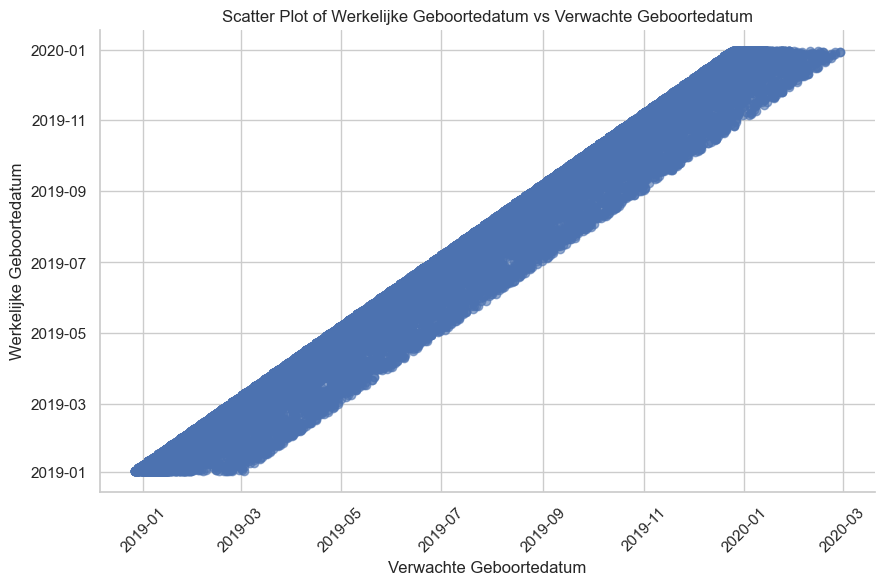

In [15]:
# Ensure that 'werkelijke datum' and 'verwachte datum' are in datetime format
dfs_geboren['werkelijke datum'] = pd.to_datetime(dfs_geboren['werkelijke datum'])
dfs_geboren['verwachte datum'] = pd.to_datetime(dfs_geboren['verwachte datum'])


# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(dfs_geboren['verwachte datum'], dfs_geboren['werkelijke datum'], alpha=0.6)

# Set title and labels
ax.set_title('Scatter Plot of Werkelijke Geboortedatum vs Verwachte Geboortedatum')
ax.set_xlabel('Verwachte Geboortedatum')
ax.set_ylabel('Werkelijke Geboortedatum')

# Improve readability and aesthetics
plt.xticks(rotation=45)
sns.despine()

plt.show()


### Onderzoek 3: Aantal namen versus aantal babies
Naarmate dat er meer babies geboren worden, gaan deze ook meer verschillende namen krijgen. Zolang er weinig babies geboren worden lijkt het logisch dat dit verband min of meer lineair is, maar naarmate dat er meer en meer babies geboren worden lijkt het niet meer logisch dat dit verband lineair blijft. We verwachten bijvoorbeeld niet dat het aantal unieke namen gegeven aan 2 miljoen babies het dubbel is van het aantal unieke namen gegeven aan 1 miljoen babies. Kan je op basis van deze dataset het verband tussen het aantal unieke namen in functie van het aantal babies eens onderzoeken? Hiervoor krijg je geen voorstel tot visualizatie maar moet je zelf mij proberen te overtuigen van je antwoord.

In [ ]:
# Step 1: Group by 'werkelijke datum' and count unique 'naam' occurrences for each date
unique_names_per_day = dfs_right.groupby('werkelijke datum')['naam'].nunique().reset_index()

unique_names_per_day.rename(columns={'date': 'werkelijke datum', 'naam': 'unique_names'})
# Step 1: Group by 'werkelijke datum' and count the number of occurrences (babies born each day)
daily_births = (dfs_right.groupby('werkelijke datum')
                        .size()
                        .reset_index()
                        .rename(columns={'werkelijke datum': 'date', 0: 'daily_births'}))


display(unique_names_per_day)
display(daily_births)

,werkelijke datum,naam
0,2019-01-02,246
1,2019-01-03,244
2,2019-01-04,266
3,2019-01-05,261
4,2019-01-06,245
...,...,...
358,2019-12-27,257
359,2019-12-28,257
360,2019-12-29,249
361,2019-12-30,249


,date,daily_births
0,2019-01-02,310
1,2019-01-03,317
2,2019-01-04,319
3,2019-01-05,330
4,2019-01-06,314
...,...,...
358,2019-12-27,315
359,2019-12-28,313
360,2019-12-29,310
361,2019-12-30,312


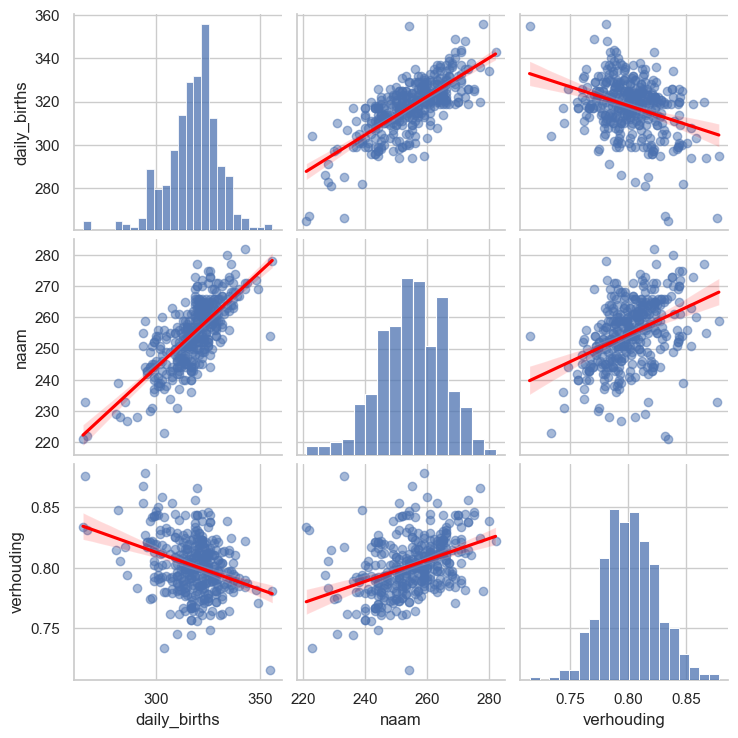

In [ ]:
births_and_names = (pd.merge(daily_births
                             , unique_names_per_day
                             , left_on='date'
                             , right_on='werkelijke datum'
                             , how='inner'))
births_and_names = births_and_names.drop(columns=['werkelijke datum'])

births_and_names['verhouding'] = births_and_names['naam'] / births_and_names['daily_births']

sns.pairplot(births_and_names
             , kind='reg'
             , plot_kws={'line_kws':{'color':'red'}
                         , 'scatter_kws': {'alpha': 0.5}})

In [ ]:
display(births_and_names)

,date,daily_births,naam,verhouding
0,2019-01-02,310,246,0.793548
1,2019-01-03,317,244,0.769716
2,2019-01-04,319,266,0.833856
3,2019-01-05,330,261,0.790909
4,2019-01-06,314,245,0.780255
...,...,...,...,...
358,2019-12-27,315,257,0.815873
359,2019-12-28,313,257,0.821086
360,2019-12-29,310,249,0.803226
361,2019-12-30,312,249,0.798077
